# In-Class Assignment 15 - Evan Callaghan

### Considering the following linear model: log(y) = 3.2 + 1.87x

### 1. Interpreting the slope:
#### For one unit of increase in X, on average, Y increases by a multiplicative factor of e^1.87 (approximately 6.49). That is, on average, Y increases by 549% for one unit of increase in X.


### 2. Using the model to estimate the value of y when x = 3.2.
#### y = e^(3.2 + 1.87(3.2))
#### y = 9,740

In [27]:
## 3. a) Using pandas to read the csv file and create a data-frame called hitters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

hitters = pd.read_csv('Hitters.csv')
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [28]:
## b) Removing observation with missing values

hitters = hitters.dropna()

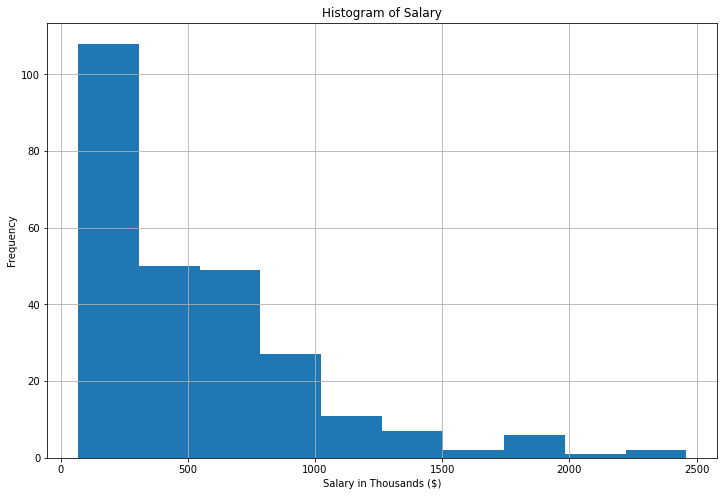

In [29]:
## c) Creating a histogram of the Salary variable

plt.figure(figsize = (12, 8))
plt.hist(hitters['Salary'])
plt.title('Histogram of Salary')
plt.xlabel('Salary in Thousands ($)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## The histogram shows that the Salary variable distribution is right-skewed.

In [33]:
## d) Building a linear regression model in which AtBat, Hits, and HmRun are the predictor
## variables and log(Salary) is the target variable

## Computing the log salary
hitters['log_salary'] = np.log(hitters['Salary'])

## Building the model
log_md = smf.ols(formula = 'log_salary ~ AtBat + Hits + HmRun', data = hitters).fit()

## Creating a player in the 1987 season with AtBat = 600, Hits = 220 and HmRun = 35
new_data = pd.DataFrame({'AtBat': [600], 'Hits':[220], 'HmRun': [35]})

## Predicting the salary of the player
np.exp(log_md.predict(new_data))


## The estimated salary for an MLB player in the 1987 season with 600 at-bats, 220 hits, and 35 homeruns is 
## $1,733,383.

0    1733.382652
dtype: float64